In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imp

import prefs
imp.reload(prefs)
from prefs import *

In [2]:
img0 = cv2.imread("out/6_3.jpg")
gray = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
h, w = gray.shape[:2]

In [176]:
#mtx = np.array([[0.00798, 0, 0.253], 
#                [0, 0.00139, -0.00037], 
#                [0, 0, -0.383]])
#dist = np.array([269, 274, 159, 122])
#newcameramtx, roi = cv2.getOptimalNewCameraMatrix(cameraMatrix=mtx, distCoeffs=dist, imageSize=(w,h), alpha=1)#,1,(w,h))
#img1 = cv2.undistort(img0, mtx, dist, None, newcameramtx)

In [3]:
perspSrc = np.array(input_image_rect, dtype=np.float32)
perspDst = np.array([[0, 0], [output_image_size[0]-1, 0], [output_image_size[0]-1, output_image_size[1]-1], [0, output_image_size[1]-1]], dtype=np.float32)
perspectiveTransform = cv2.getPerspectiveTransform(perspSrc, perspDst)
img1 = cv2.warpPerspective(gray, perspectiveTransform, (output_image_size[0], output_image_size[1]))

In [4]:
(thr, img2) = cv2.threshold(img1, 200, 255, cv2.THRESH_BINARY)

In [179]:
#params = cv2.SimpleBlobDetector_Params()
#params.filterByArea = True
#params.minArea = 20  # The dot in 20pt font has area of about 30
#params.filterByCircularity = False
#params.minCircularity = 0.7
#params.filterByConvexity = False
#params.minConvexity = 0.8
#params.filterByInertia = False
#params.minInertiaRatio = 0.4
#detector = cv2.SimpleBlobDetector_create(params)
#spot_keypoints = detector.detect(img1)
#
#img3 = cv2.drawKeypoints(img2, spot_keypoints, outImage=np.array([]), color=(0, 0, 255),
#                                               flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [5]:
moments = cv2.moments(img2, True)

mm10 = moments["m10"]
mm01 = moments["m01"]
mm00 = moments["m00"]

center = (int(mm10 / mm00), int(mm01 / mm00))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


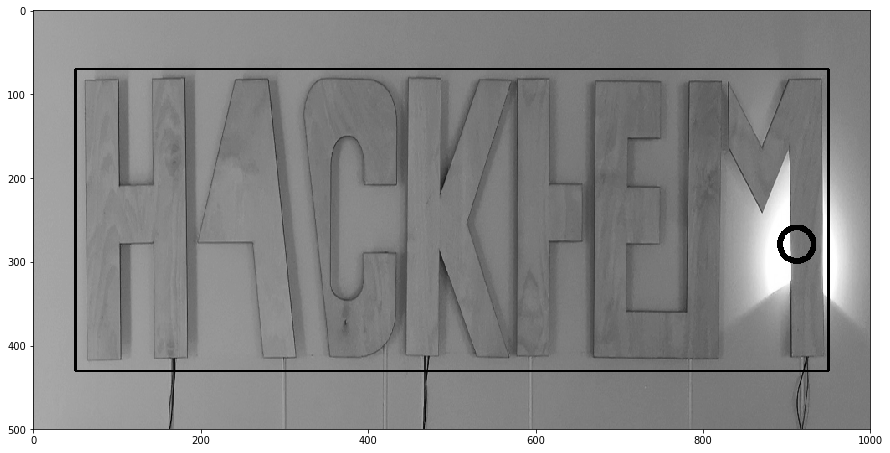

In [6]:
imgout = np.array(img1, copy=True)  
cv2.circle(imgout,(center[0], center[1]), 20, (0,255,0), 6)

corx1 = 0 + out_point_padding[0]
corx2 = output_image_size[0] - out_point_padding[0]
cory1 = 0 + out_point_padding[1]
cory2 = output_image_size[1] - out_point_padding[1]

cv2.line(imgout, (corx1, cory1), (corx1, cory2), 1, 2)
cv2.line(imgout, (corx1, cory1), (corx2, cory1), 1, 2)
cv2.line(imgout, (corx2, cory2), (corx1, cory2), 1, 2)
cv2.line(imgout, (corx2, cory2), (corx2, cory1), 1, 2)

fig1 = plt.figure(figsize = (15,15))
ax1 = fig1.add_subplot(111)
ax1.imshow(imgout, cmap=plt.cm.gray, interpolation='nearest')
fig1.show()